# Digital Signal Processing

### MsCV - ViBOT - MAIA

The reasons to convert signals into frequency domain is to get the idea of different frequency components it is composed of. This might help to detect the required signals and classify them, for examples, speak or speech recognition from a sound wave, noise removal from the image, or finding recurring patterns within images. 

In [19]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from scipy import signal


import os, os.path
from skimage import color
from scipy import misc
from scipy.misc import imresize

Pretty printing has been turned OFF


# Discrete Fourier Transform
The Discrete Fourier Transform (DFT) converts discrete data from a time domain into frequency domain. The DFT analyzes the finite segment in one period of an infinitely extended periodic signal, which is defined as: 
$$ X[n] = \sum^{N-1}_{k = 0} x[k] e^{-j(2\pi/N)kn}$$


Note: The Fast Fourier Transform (FFT) is simply an algorithm to compute the DFT in a faster way!

## Exercise 1 -  ** DFT** 
**1.1** The DFT of a $5$ Hz sin wave sampled with the sampling of $f_s = 50$ Hz over 1000 (N = 1000) samples is computed as follows:


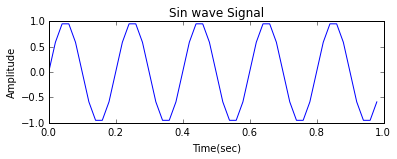

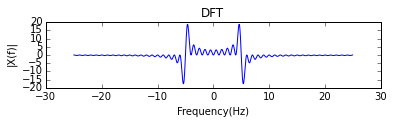

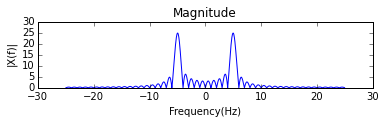

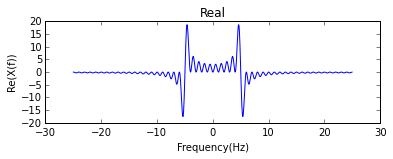

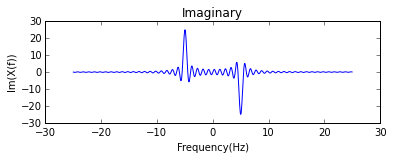

In [20]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.sin(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Sin wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()


# In the sin wave:
# the peaks in the real part of the frequency domain are both positive and negative. 
# in the imaginary part of the frequency domain there is one positive peak, and then one negative. 


**1.2** Compute the DFT of a cosine wave, how that differs from that of a sine wave ?

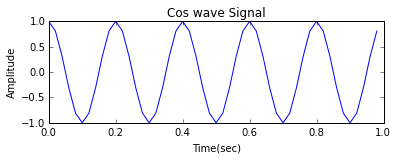

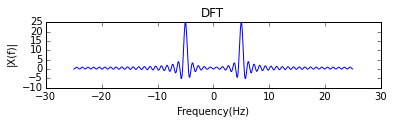

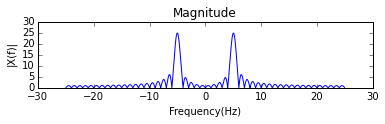

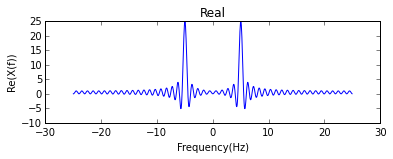

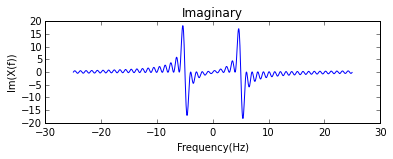

In [21]:


# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.cos(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Cos wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

# In the cos wave:
# the peaks in the real part of the frequency domain are only positive.
# the peaks in the imaginary part of the frequency domain are both positive and negative. 

**1.3** Use square wave using the same frequncy and sampling frequency.

Note use `signal.square` to create your signal. 

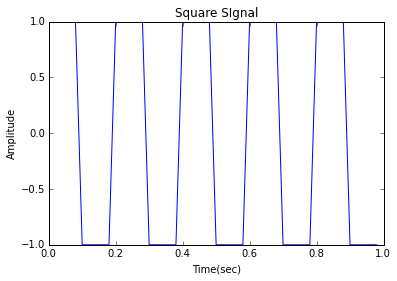

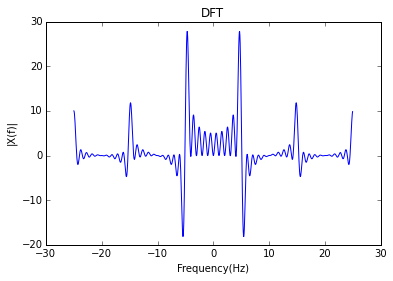

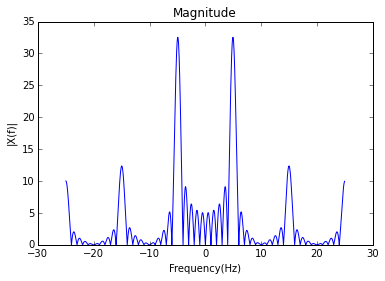

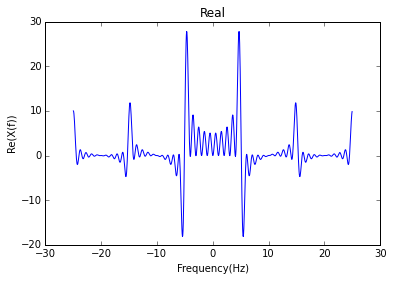

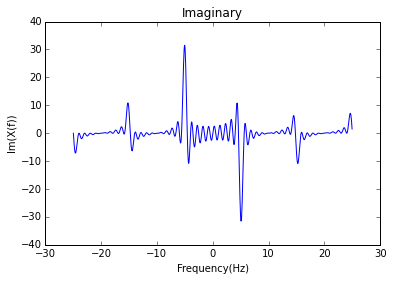

In [22]:
from scipy import signal

# Signal frequency and sampling frequency
f = 5.
fs = 50.

# Time vector for one second
t = np.arange(0, 1., 1./fs)

# Square Signal
square = signal.square(2 * np.pi * 5 * t)

#Number of samples
N = 1000

#Frequency vector
fr = (np.arange(-N/2, N/2, 1)) * fs/N

# Using fftshift 
square_f = np.fft.fftshift(np.fft.fft(square, N))


plt.figure
plt.plot(t, square)
plt.title('Square SIgnal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot(fr, square_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.plot(fr, np.abs(square_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.plot(fr, np.real(square_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.plot(fr, np.imag(square_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()


**1.4** Use white Gaussian noise N = 10000. 

(Note use `np.random.normal` to create your noise) 

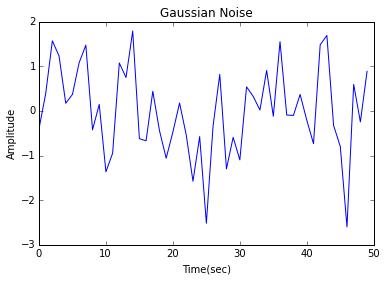

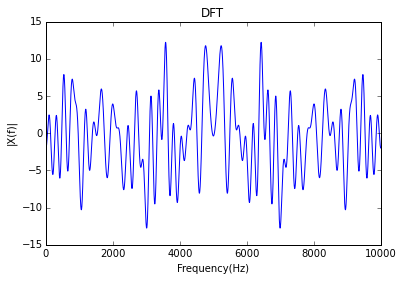

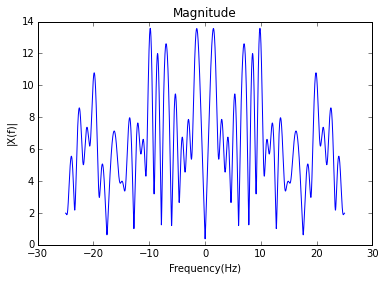

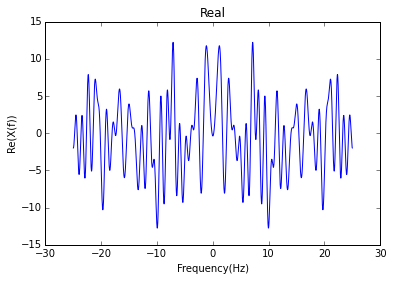

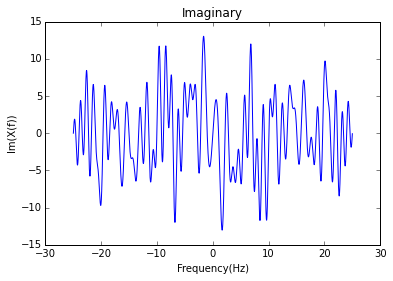

In [23]:
f = 5.        #signal frquency
fs = 50.    #sample frequency
N = 10000

# time vector for 1 second 
t = np.arange (0, 1., 1./fs)

# frequency vector
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N

#Creating the gaussian noise
gaus_noise = np.random.normal( size = t.shape[0])

# Applying fourier transform
gaus_f = np.fft.fftshift(np.fft.fft(gaus_noise, N))

plt.figure
plt.plot(gaus_noise)
plt.title('Gaussian Noise')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot( gaus_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.plot(fr, np.abs(gaus_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.plot(fr, np.real(gaus_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.plot(fr, np.imag(gaus_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

## Exercise 2 -  Sampling 

Generate and display the following signals of 1 sec duration.
$$x[n] = 3 cos(2\pi\frac{f_{1}}{f_{s}}n) + 4 sin(2\pi\frac{f_{2}}{f_{s}}n)$$
for $f_{1} = 5$ Hz and $f_{2} = 20$ Hz, sampled with the sampling frequencies of $f_{s} = [10, 20, 25, 40, 50, 100, 150]$


**2.1** Plot $x[n]$ for different sampling frequencies in time domain.

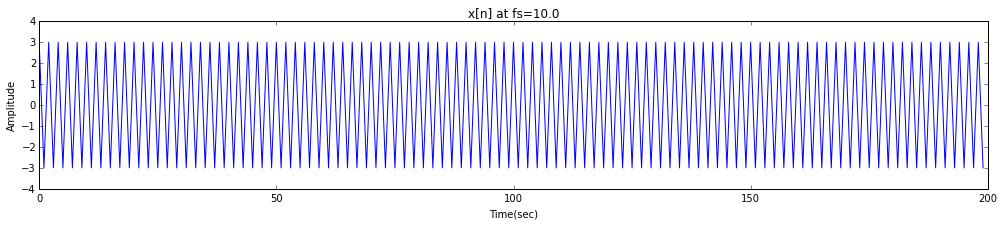

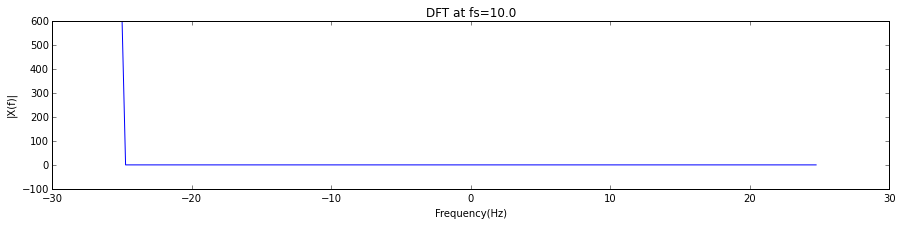

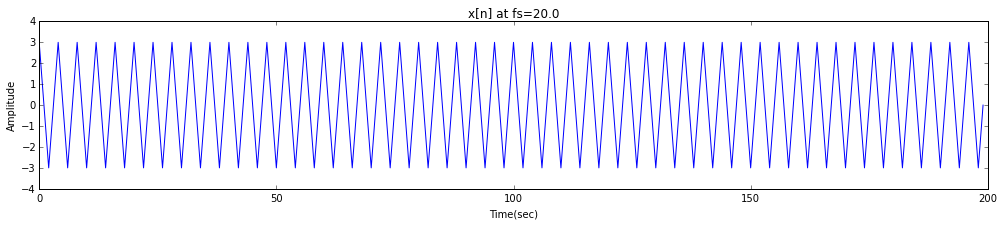

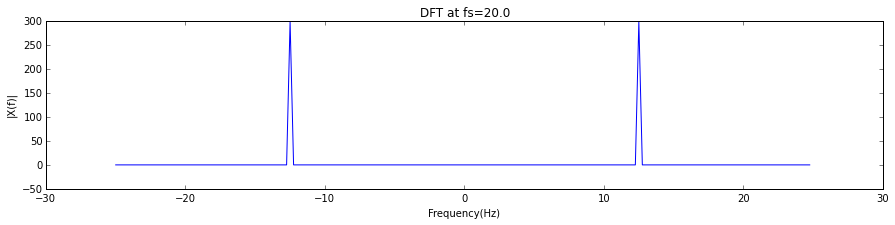

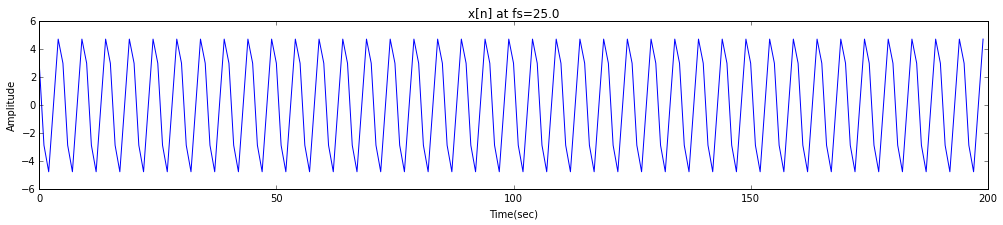

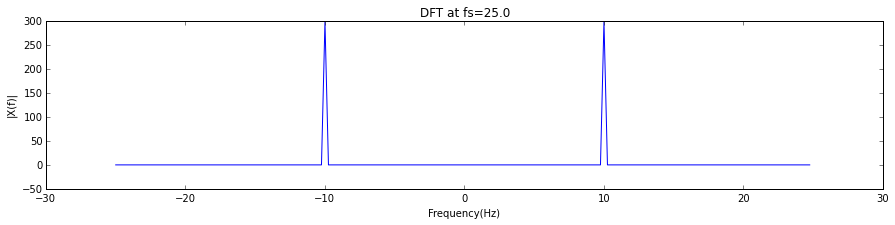

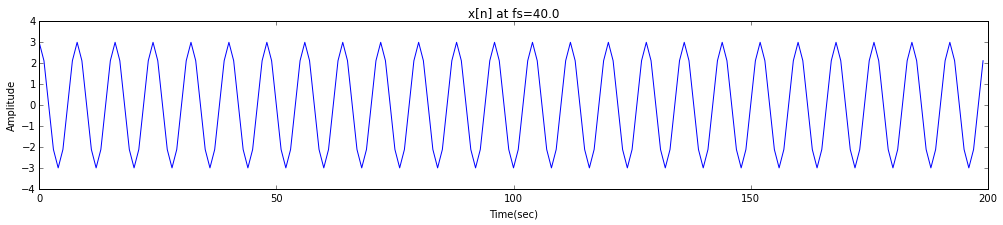

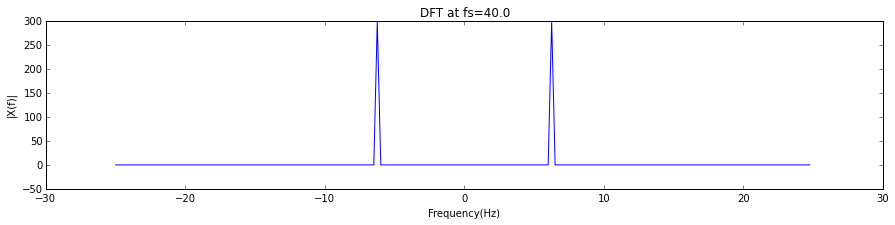

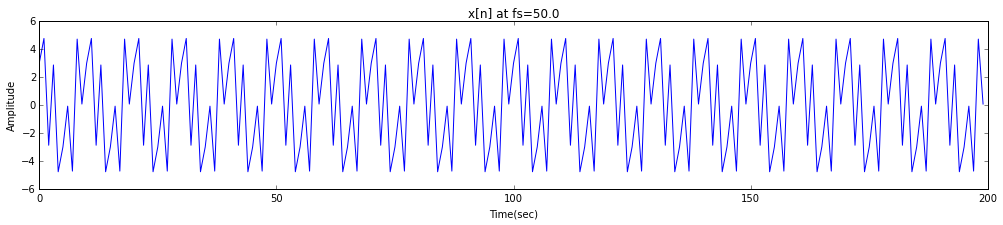

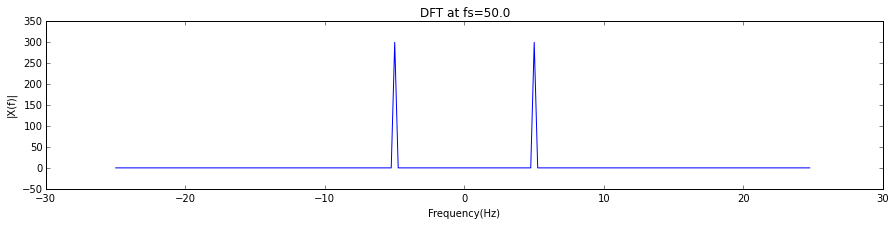

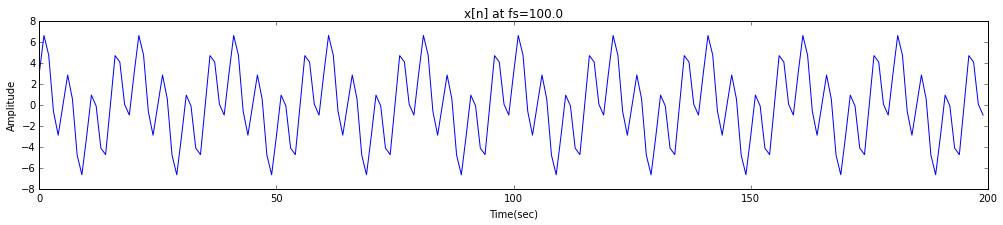

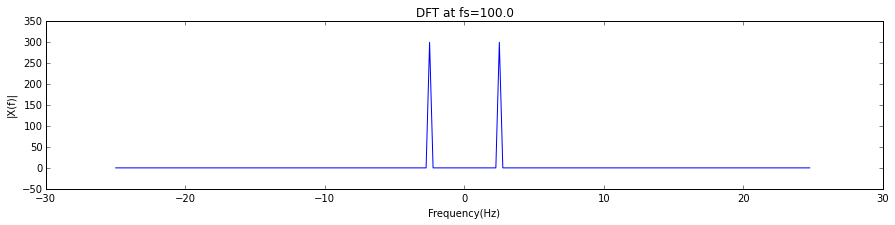

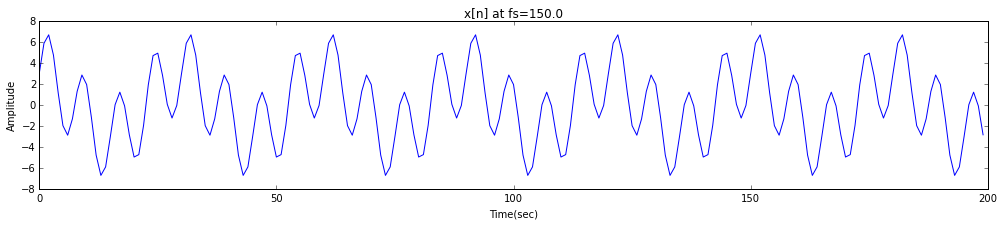

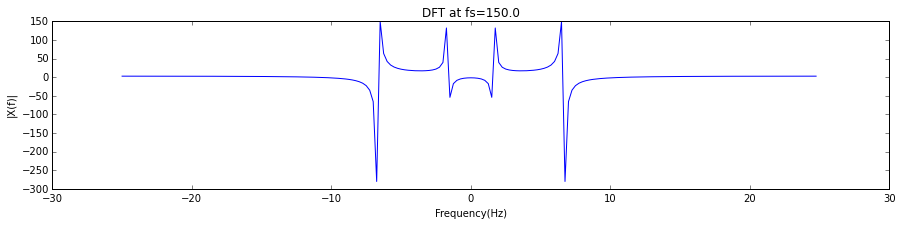

In [24]:
f1 = 5.   # Signal frequency 
f2 = 20.  # Sampling frequency
N = 200   # Number of samples 

#Array with sampling frequencies
fs_arr = np.array([10., 20., 25., 40., 50., 100., 150.])

# time vector for 1 second 
n = np.arange(N)

# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N

for i in range(fs_arr.shape[0]):
 
    fs = fs_arr[i]
    
    # square wave 
    x_n = 3*np.cos(2*np.pi* (f1/fs) * n) + 4*np.sin(2 * np.pi * (f2/fs) * n)

    # Applying fourier transform
    x_f = np.fft.fftshift(np.fft.fft(x_n, N))

    # displaying x(n)
    plt.figure(figsize=(17, 3))
    plt.plot(n, x_n)
    plt.title('x[n] at fs=' + str(fs))
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    plt.show()

    #Displaying fft
    plt.figure(figsize=(15, 3))
    plt.plot( fr, x_f)
    plt.title('DFT at fs=' + str(fs))
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('|X(f)|')
    plt.show()







**2.2.** Discuss the aliasing effects in the time domain:

**2.3** Compute the FFT of the above signals and display their centered frequency components.
Discuss your observations.

In [25]:
# We have to centers for the frequencies: 5 for the cosine and 20 for the sine
# Due to the size of our sampling frequency fs, we cannot observe this centers at the beginning (when fs=10,20,25)
# When we have a sample frequency big enough, like fs=40, we can start to appreciate both peaks (sine and cosine)
# When fs = 50 or bigger we can appreciate better both centers (5 for cosine, 20 for sine)
# If both signals had the same center we could have appreciated them from the beginning, when fs = 20.

## Exercise 3 - 1D  DFT for image classification

1D DFT can be applied to analyze the frequency components along the one dimensional profile of an image. Here we want to use these information to classify the images into two different classes (**barcode** and **non-barcode** classes)
To do so we first 
* Load the images from 1D-DFT folder
    * **3.1** you have to normalize and resize the images to the smallest size 
    * **3.2** Take 1D profile as shown in the example and compute its DFT.
![](profile1.png)
    
    * **3.3** Separate the images to two different groups of **barcode** and **non-barcode** based on their frequency spectrum of their profile 
* Some information regarding the images:
    * There are 54 images while Images [1, 2, 6, 44:54] are barcode images and the others are similar patterns.
    
**3.4** Discuss your results

In [54]:
Path = '../images/1D-DFT/'

filenames = sorted( [f for f in os.listdir(Path)] )
images = list()

for f in filenames:
    images.append ( img_as_float (io.imread (os.path.join (Path,f), as_grey=True)))

    
    if(len(images) is 1):       # Identifting which is the smallest size
        smallest = images[0].shape
    else:
        if(np.prod(smallest) > np.prod( images [ len(images)-1 ].shape)):
            smallest = images[len(images)-1].shape

barcode = np.zeros((len(images)))
barcode[43:53] = barcode[0] = barcode[1] = barcode[5] = 1

for i in range (len (images) ):
    
    images[i] = misc.imresize (images[i], smallest)   # Resizing to smallest size
    images[i] = (images[i]- images[i].min()) / (images[i].max() - images[i].min())
    
 
    images[i] = images[i][int(images[i].shape[0]/2), :]   #obtaining one image from the middle
    

    #is_barcode = barcode
    #normalized
    #barcode_profiles = barcode_properties
    
normalized = list()
barcode_properties = None

for i in range( len(images) ):
    N = images[0].shape[0]
    
    fr = ( np.arange(-N/2,N/2,1))  # creating a frequency vector
  
    x_f = np.abs(np.fft.fftshift(np.fft.fft(images[i], N)))  # applying FFT
    
    x_f = ( x_f - x_f.min())/(x_f.max() - x_f.min() )
    
    normalized.append(x_f)  
    
    #Construct mean DFT of barcode profiles
    if( barcode[i] == 1):
        if(barcode_properties is None):
            barcode_properties = np.matrix(x_f) 
        else:  #if the DFT of the img has barcode properties it stores it in the matrix for barcodes. 
            barcode_properties = np.concatenate((barcode_properties, np.matrix(x_f)))
            

barcode_mean = np.mean(barcode_properties, axis=0) #obtaining mean DFT for the barcodes

distance_barcode = list() # distance to barcode image
distance_nonbarcode = list() #distance to a non barcode imgage

for i, profile in zip(range(len(normalized)), normalized):
    
    distance = np.sum (np.power ( profile - barcode_mean, 2))

    if(barcode[i] == 1):
        distance_barcode.append(distance)
    else:
        distance_nonbarcode.append(distance)

# Take the minimum of distance to average for non_barcode, all the smaller distances correspond to barcode images :D
threshold = min (distance_nonbarcode)


distance_barcode = list()
distance_nonbarcode = list()


for i, profile in zip(range(len(normalized)), normalized):
    
    distance = np.sum (np.power (profile - barcode_mean, 2))
    
    if(distance > threshold):
        distance_nonbarcode.append(i)
    else:
        distance_barcode.append(i)
        

# There are 54 images in total. Images [1, 2, 6, 44:54] are barcode 
total_images = np.round (len(distance_barcode))
final_barcode = np.round (len(barcode [barcode == 1]), 2)
final_nonbarcode = (total_images - final_barcode)


print 'There is a total of ', total_images  , 'images in the file' 
print 'From which: ', final_barcode , ' are barcode images'
print 'And: ', final_nonbarcode,' are non-barcode images'


                                    

    

There is a total of  54 images in the file
From which:  13  are barcode images
And:  41  are non-barcode images


/home/masters/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in divide
